# Lenet-5 design
## The architecture is as follows:
<img src="./imgs/architecture.png", width=755, heigth=363>

## Import necesary libraries

In [1]:
import cv2
from PIL import Image as PIL_Image
from PIL import ImageEnhance
from PIL import ImageOps
from array import *
import numpy as np
import math
from scipy import misc

## Capture and show an image using a USB camera

In [2]:
def capture_and_convert2grey():
    cap = cv2.VideoCapture(0) #capture an img
    _ , cv2_im = cap.read()
    cv2_im = cv2.cvtColor(cv2_im,cv2.COLOR_BGR2RGB)#convert BGR to RGB 
    img = PIL_Image.fromarray(cv2_im).convert("L")  #from np array to Pillow img(grey)
    img.show()
    return img

In [3]:
img=capture_and_convert2grey()

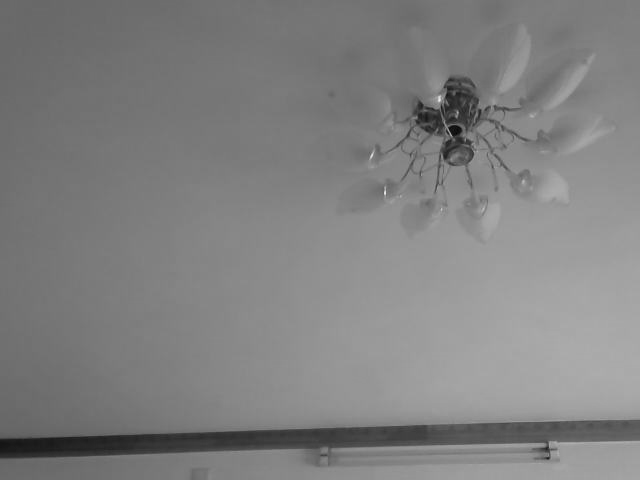

In [4]:
img

## Image Enhancement

In [5]:
def img_enhancement(img):        
    #Image enhancement                
    contr = ImageEnhance.Contrast(img)
    img = contr.enhance(3)                                                    # The enhancement values (contrast and brightness) 
    bright = ImageEnhance.Brightness(img)                                     # depends on backgroud, external lights etc
    img = bright.enhance(4.0)    
    return img

## scale the img and store image to local storage

In [6]:
def scale_and_save_img(img,filename):
    #Adding a border for future cropping
    img = ImageOps.expand(img,border=80,fill='white') 

    #Find bounding box  
    inverted = ImageOps.invert(img)  
    box = inverted.getbbox()  
    img_new = img.crop(box)  
    width, height = img_new.size  
    ratio = min((28./height), (28./width))  
    background = PIL_Image.new('RGB', (28,28), (255,255,255))  
    if(height == width):  
        img_new = img_new.resize((28,28))  
    elif(height>width):  
        img_new = img_new.resize((int(width*ratio),28))  
        background.paste(img_new, (int((28-img_new.size[0])/2),int((28-img_new.size[1])/2)))  
    else:  
        img_new = img_new.resize((28, int(height*ratio)))  
        background.paste(img_new, (int((28-img_new.size[0])/2),int((28-img_new.size[1])/2)))  
  
    background  
    img_data=np.asarray(background)  
    img_data = img_data[:,:,0]  
    misc.imsave('/home/xilinx/jupyter_notebooks/work/Lenet-5/'+filename, img_data) 
    return img_data,background #img_data is an np array, background is a Pillow format image

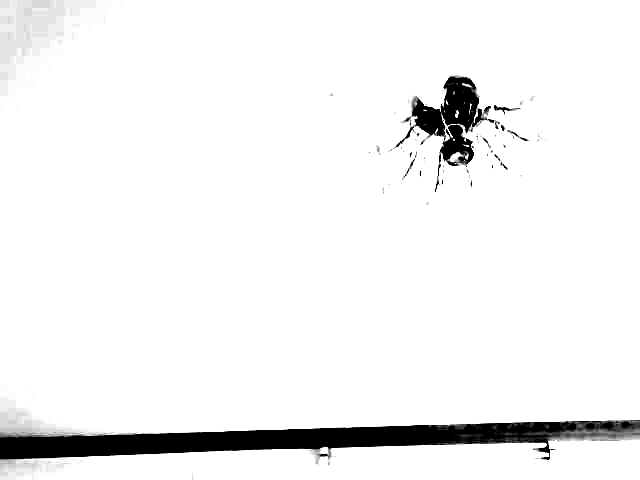

In [7]:
img=img_enhancement(img)
img

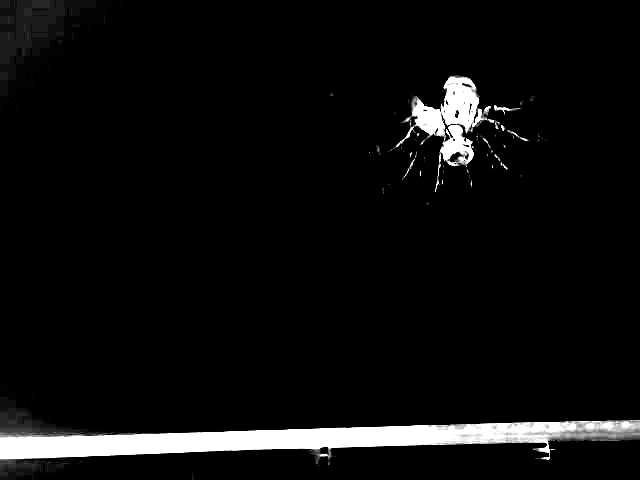

In [8]:
img = ImageOps.invert(img)  
img

In [9]:
img_data,background=scale_and_save_img(img,'saved_img.png')

In [10]:
background

## load imgs from local SD card

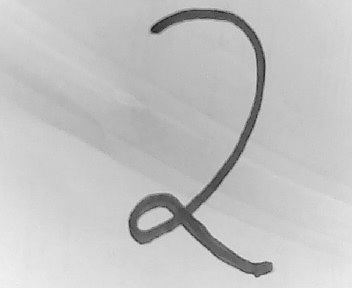

In [13]:
path_to_local_img="/home/xilinx/jupyter_notebooks/work/Lenet-5/webcam_image_mnist.jpg" #please input the absolute path of a local img
img_load = PIL_Image.open(path_to_local_img).convert("L")  
img_load

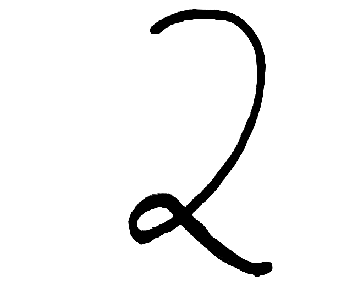

In [14]:
img_load=img_enhancement(img_load)
img_load

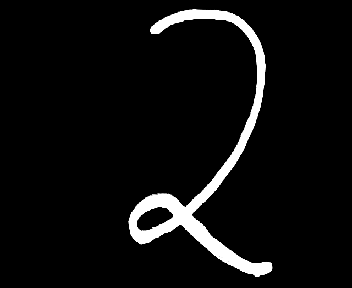

In [15]:
img_load = ImageOps.invert(img_load)  
img_load

In [16]:
img_data,background=scale_and_save_img(img_load,'save_load_img.png')

In [17]:
background

## import pynq related packages

In [18]:
from IPython.display import display
from pynq import Xlnk
from pynq import Overlay

## load Lenet-5 bitstream

In [ ]:
lenet5_design = Overlay("./bitstream/?.bit")

## create IP objects

## load img from SD card and preprocess

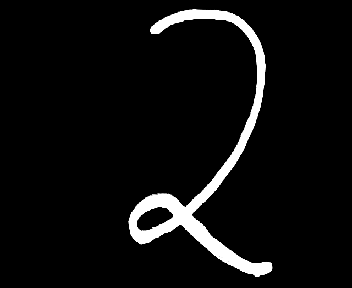

In [19]:
path_to_local_img="/home/xilinx/jupyter_notebooks/work/BNN-PYNQ-master/notebooks/pictures/webcam_image_mnist.jpg" #please input the absolute path of a local img
img_load = PIL_Image.open(path_to_local_img).convert("L")  
img_load=img_enhancement(img_load)
img_load = ImageOps.invert(img_load)  
img_load

In [20]:
img_data,background=scale_and_save_img(img_load,'save_loadimg.png')
background

In [21]:
img_data.shape

(28, 28)

## allocate memory for PL processings

In [22]:
xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(28, 28), 
                           dtype=np.uint8)
out_buffer = xlnk.cma_array(shape=(28, 28), 
                            dtype=np.uint8)

np.copyto(in_buffer,img_data)
#in_buffer.nbytes = input_array.nbytes
buf_image = PIL_Image.fromarray(in_buffer)
display(buf_image)

## PL processings

## reset 

In [23]:
in_buffer.close()
out_buffer.close()
xlnk.xlnk_reset()